In [38]:
import trimesh
import numpy as np
import scipy
from vedo import Mesh, Points, Lines, show, settings

In [39]:
# Optional: for better Jupyter support (only needed in notebooks)
settings.use_depth_peeling = True

In [ ]:
# === Load your 3D model ===
# Replace with your file path (must be .obj, .stl, or .gltf)
FILE_PATH = "../../datos/bugatti.obj"

In [41]:
# Load with trimesh
mesh_trimesh = trimesh.load(FILE_PATH)

In [42]:
# Check if it's a scene (GLTF/GLB often is), and extract geometry
if isinstance(mesh_trimesh, trimesh.Scene):
    # Combine all geometries into one mesh
    mesh_trimesh = trimesh.util.concatenate(
        tuple(g for g in mesh_trimesh.geometry.values())
    )

In [43]:
# === Extract geometry info ===
vertices = mesh_trimesh.vertices
faces = mesh_trimesh.faces

In [44]:
# Optional: compute edges if not available
edges = mesh_trimesh.edges_unique

In [45]:
print(f"🔢 Vertices: {len(vertices)}")
print(f"🧩 Faces: {len(faces)}")
print(f"📐 Edges: {len(edges)}")

🔢 Vertices: 24461
🧩 Faces: 48918
📐 Edges: 73377


=== Create Vedo objects for visualization ===


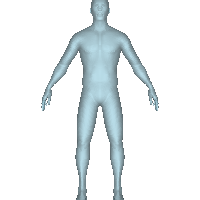

In [46]:
# Main mesh with face color
vedo_mesh = Mesh([vertices, faces])
vedo_mesh.c("lightblue").alpha(0.6).lighting("plastic")

In [47]:
# Vertices as red points
vedo_points = Points(vertices, r=8, c="green")

In [ ]:
# Edges as black lines
edge_coords = np.array([[vertices[e[0]], vertices[e[1]]] for e in edges])
vedo_edges = Lines(edge_coords, c="black", lw=1)

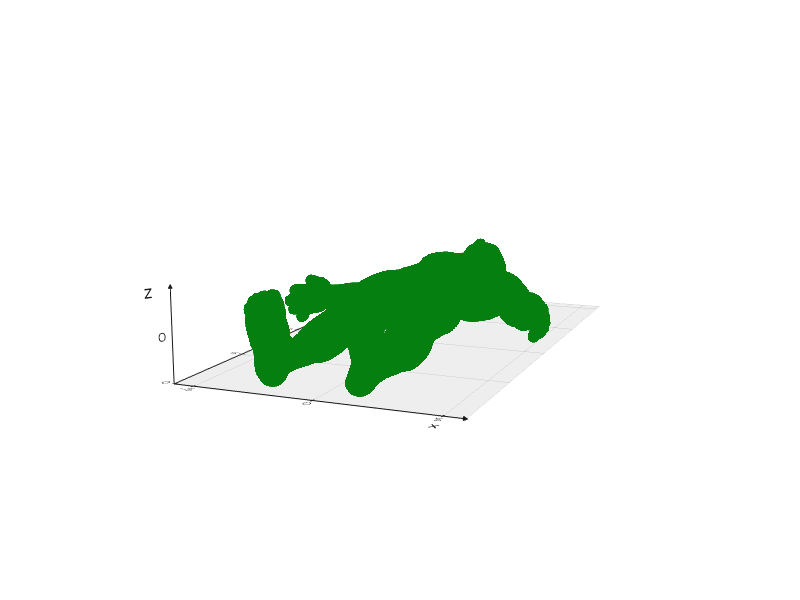

In [ ]:
# === Show in an interactive window ===
show(
    vedo_mesh,
    vedo_edges,
    vedo_points,
    
    axes=1,
    viewup="z",
)